<center> <h1>Predicting wins in League of Legends</h1> </center>
<center> <h2>Machine Learning&Deep Learning Class</h2> </center>

https://www.kaggle.com/paololol/league-of-legends-ranked-matches

## Data Fields

### Below you can find the full list of variables present in the data set

#### Champs data set
- name - In-game name of the champion
- id - ID of the champion
#### Matches data set
- id - Match ID
- gameid - Game ID
- platformid - Platform ID
- queueid - Queue ID
- seasonid - Season ID (number of the following seasons: they are enumerated in LOL)
- duration - Duration of the match
- creation - ?
- version - Version of the game
#### Participants data set
- id - ID of the player
- matchid - Match ID
- player - ID of the player in the team (from 1 to 10; where 1-5 is one team and 5-10 is another)
- championid - ID of the champion which player took
- ss1 - Summoner spell on D (should be Flash)
- ss2 - Summoner spell on F (should not be Flash)
- role - SOLO for top and mid, NONE for jungle, DUO_CARRY or DUO_SUPPORT for botlane
- position - bot/jungle/top/mid
#### Stats1&2 data set
- id - ID of the player
- win - Binary variable 0 - lose, 1 - win
- item1 - ID of the first item bought
- item2 - ID of the second item bought
- item3 - ID of the third item bought
- item4 - ID of the fourth item bought
- item5 - ID of the fifth item bought
- item6 - ID of the sixth item bought
- trinket - ?
- kills - How many kills player aquired
- deaths - How many times player died
- assists - How many assists player aquired
- largestkillingspree - Largest killing-spree player aquired
- largestmultikill - Largest multi-kill player aquired
- killingsprees - How many killing-sprees player had
- longesttimespentliving - Longest time the player stayed alive
- doublekills - How many double kills player aquired
- triplekills - How many triple kills player aquired
- quadrakills - How many quadra kills player aquired
- pentakills - How many penta kills player aquired
- legendarykills - How many legendary kills player aquired
- totdmgdealt - How much total damage player dealt
- magicdmgdealt - How much magic damage player dealt
- physicaldmgdealt - How much physical damage player dealt
- truedmgdealt - How much true damage player dealt (surpassing armor)
- largestcrit - Largest critical damage player dealt
- totaldmgtochamp - Total damage dealt to other champions
- magicdmgtochamp - Magic damage dealt to other champions
- physdmgtochamp - Physical damage dealt to other champions
- truedmgtochamp - True damage dealt to other champions (surpassing armor)
- totheal - Total heal received
- totunitshealed - How many allies player healed
- dmgselfmit - ?
- dmgtoobj - Damage dealt to NPCs
- dmgtoturrets - Damage dealt to turrets
- visionscore - ?
- timecc - EMPTY
- totdmgtaken - Total damage received
- magicdmgtaken - Magic damage received
- physdmgtaken - Physical damage received
- truedmgtaken - True damage received (surpassing armor)
- goldearned - Amount of gold aquired in total
- goldspent - Amount of gold spent in total
- turretkills - How many turrets player last hit
- inhibkills - ?
- totminionskilled - How many minions player killed
- neutralminionskilled - ?
- ownjunglekills - How many jungle monsters on the player side of the map player killed
- enemyjunglekills - How many jungle monsters on the opposite side of the map player killed
- totcctimedealt - Total champion controll time player hold other players
- champlvl - Max level of the players champ in the match
- pinksbought - ?
- wardsbought - ?
- wardsplaced - ?
- wardskilled - ?
- firstblood - Binary variable: Does player was the first one to kill enemy champ in the match
#### Teamstats data set

Data set consisted mostly of binary variables, which give us info does team manage to do following things first
- matchid - Match ID
- teamid - Team ID (either 100 or 200)
- firstblood - First blood
- firsttower - First turret
- firstinhib - First inhibitor
- firstbaron - First baron killed
- dragonkills - First dragon killed
- firstharry - First herald killed
- towerkills - Tower destroyed total
- inhibkills - Inhibitors destroyed total
- baronkills - Baron killed total
- dragonkills - Dragon killed total
- harrykills - Herald killed total

#### Teambans data set

- matchid - Match ID
- teamid - Team ID
- championid - Champion ID
- banturn - Which champion was banned first/second/third - max 6

![](https://s.redefine.pl/file/o2/redefine/cp/kn/knmqd3dfmtog1sp4a3z8zvn9rer4gjgo.png)

## League of Legends: An Overview

League of Legends is a fast-paced, competitive online game that blends the speed and intensity of an RTS with RPG elements. Two teams of powerful champions, each with a unique design and playstyle, battle head-to-head across multiple battlefields and game modes. With an ever-expanding roster of champions, frequent updates and a thriving tournament scene, League of Legends offers endless replayability for players of every skill level.

## Aim of the project

<b>The aim of this project is to use machine learning to build classification models which will predict the outcome of the match - win or lose, basing on the given data.</b>

The second aim is to compare these three different models and check which of them outperforms others

# Data preparation
## Libraries

In [0]:
# Standard stuff
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from random import shuffle

# For saving the models
import pickle

# XGBoost
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV, KFold # For CV
from scipy import stats # F1 score

# Random forest
import sklearn as sk
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
import sklearn.metrics as metrics
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Tensorflow and Keras
import tensorflow as tf
import tensorflow.python.keras
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.callbacks import History 
from tensorflow.python.keras.optimizers import SGD

In [0]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format', lambda x: '%.2f' %x)
warnings.filterwarnings("ignore")

In [0]:
# Center all plots by CSS
from IPython.core.display import HTML

HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    margin:auto;
    }
.prompt 
    display:none;
}  
</style>
""")

## Data import


In [0]:
from google.colab import drive
drive.mount('/LOL-Model')

Drive already mounted at /LOL-Model; to attempt to forcibly remount, call drive.mount("/LOL-Model", force_remount=True).


In [0]:
# Champions and ID
champions = pd.read_csv('/LOL-Model/My Drive/LOL-Model/data/champs.csv')

# Matches
matches = pd.read_csv('/LOL-Model/My Drive/LOL-Model/data/matches.csv')

# Player info
playersInfo = pd.read_csv('/LOL-Model/My Drive/LOL-Model/data/participants.csv')

# Stats
stat1 = pd.read_csv('/LOL-Model/My Drive/LOL-Model/data/stats1.csv', low_memory=False)
stat2 = pd.read_csv('/LOL-Model/My Drive/LOL-Model/data/stats2.csv', low_memory=False)
stats = stat1.append(stat2)

# Team - bans
bannedChampion = pd.read_csv('/LOL-Model/My Drive/LOL-Model/data/teambans.csv')

# Team - stats 
teamStats = pd.read_csv('/LOL-Model/My Drive/LOL-Model/data/teamstats.csv')

In [0]:
stats.describe()

,id,win,item1,item2,item3,item4,item5,item6,trinket,kills,deaths,assists,largestkillingspree,largestmultikill,killingsprees,longesttimespentliving,doublekills,triplekills,quadrakills,pentakills,legendarykills,totdmgdealt,magicdmgdealt,physicaldmgdealt,truedmgdealt,largestcrit,totdmgtochamp,magicdmgtochamp,physdmgtochamp,truedmgtochamp,totheal,totunitshealed,dmgselfmit,dmgtoobj,dmgtoturrets,visionscore,timecc,totdmgtaken,magicdmgtaken,physdmgtaken,truedmgtaken,goldearned,goldspent,turretkills,inhibkills,totminionskilled,neutralminionskilled,ownjunglekills,enemyjunglekills,totcctimedealt,champlvl,pinksbought,wardsplaced,wardskilled,firstblood
count,1834517.00,1834517.00,1834517.00,1834517.00,1834517.00,1834517.00,1834517.00,1834517.00,1834517.00,1834517.00,1834517.00,1834517.00,1834517.00,1834517.00,1834517.00,1834517.00,1834517.00,1834517.00,1834517.00,1834517.00,1834517.00,1834517.00,1834517.00,1834517.00,1834517.00,1834517.00,1834517.00,1834517.00,1834517.00,1834517.00,1834517.00,1834517.00,1834517.00,1834517.00,1834517.00,1834517.00,1834517.00,1834517.00,1834517.00,1834517.00,1834517.00,1834517.00,1834517.00,1834517.00,1834517.00,1834517.00,1834517.00,1834517.00,1834517.00,1834517.00,1834517.00,1834517.00,1834517.00,1834517.00,1834517.00
mean,944850.85,0.50,2429.24,2714.03,2657.57,2526.02,2143.62,1472.66,3336.69,5.79,5.81,8.32,2.67,1.33,1.34,630.66,0.54,0.07,0.01,0.00,0.00,113836.99,39027.54,69667.55,5141.14,241.95,17702.96,7750.30,8951.45,1000.56,5385.71,2.25,10826.29,4124.77,2146.03,13.84,0.00,23197.80,8121.81,14025.03,1050.20,11415.60,10370.91,0.91,0.18,120.98,19.94,12.22,7.72,429.17,14.22,0.98,11.48,1.78,0.10
std,532872.30,0.50,949.72,811.68,909.92,1036.76,1253.74,1333.67,192.95,4.60,3.27,5.92,2.53,0.76,1.26,311.07,0.93,0.30,0.11,0.04,0.00,1587345.92,49070.40,70700.56,1585672.28,418.54,11474.93,9264.52,9946.48,1635.84,5519.06,2.47,14663.11,6656.78,2953.73,17.40,0.00,11853.76,5149.31,7738.67,1272.25,4008.58,3869.36,1.21,0.46,83.96,31.63,20.32,13.00,660.76,3.12,1.41,7.55,2.23,0.30
min,9.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-2147483648.00,0.00,0.00,-2147483648.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,643.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
25%,484856.00,0.00,1402.00,2301.00,3006.00,2045.00,1033.00,0.00,3340.00,2.00,3.00,4.00,0.00,1.00,0.00,434.00,0.00,0.00,0.00,0.00,0.00,59653.00,4563.00,11530.00,442.00,0.00,9411.00,1335.00,1452.00,20.00,1734.00,1.00,0.00,0.00,0.00,0.00,0.00,15226.00,4516.00,8610.00,275.00,8864.00,7950.00,0.00,0.00,39.00,0.00,0.00,0.00,111.00,13.00,0.00,7.00,0.00,0.00
50%,945089.00,0.00,3047.00,3075.00,3065.00,3047.00,3031.00,1038.00,3340.00,5.00,6.00,7.00,2.00,1.00,1.00,590.00,0.00,0.00,0.00,0.00,0.00,109336.00,17823.00,42791.00,1976.00,0.00,15553.00,4166.00,4591.00,456.00,3778.00,1.00,6310.00,675.00,985.00,9.00,0.00,21522.00,7236.00,12789.00,657.00,11350.00,10275.00,0.00,0.00,125.00,4.00,2.00,1.00,251.00,15.00,1.00,10.00,1.00,0.00
75%,1406919.00,1.00,3142.00,3152.00,3117.00,3111.00,3102.00,3047.00,3363.00,8.00,8.00,12.00,4.00,2.00,2.00,792.00,1.00,0.00,0.00,0.00,0.00,157253.00,57935.00,113678.00,7080.00,427.00,23651.00,10940.00,14043.00,1203.00,7240.00,3.00,15631.00,5851.00,3228.00,22.00,0.00,29430.00,10721.00,18178.00,1352.00,13937.00,12750.00,1.00,0.00,186.00,22.00,13.00,10.00,518.00,16.00,1.00,14.00,3.00,0.00
max,1865604.00,1.00,3933.00,3933.00,3933.00,3933.00,3933.00,3933.00,3513.00,45.00,38.00,57.00,35.00,6.00,13.00,3038.00,12.00,7.00,4.00,2.00,1.00,1064761.00,789034.00,917986.00,713886.00,4876.00,152607.00,142469.00,123871.00,36143.00,102060.00,113.00,311225.00,84057.00,62488.00,179.00,0.00,165152.00,84580.00,90430.00,31648.00,40982.00,70255.00,10.00,7.00,673.00,299.00,176.00,181.00,25204.00,18.00,54.00,690.00,86.00,1.00


In [0]:
teamStats.describe()

,matchid,teamid,firstblood,firsttower,firstinhib,firstbaron,firstdragon,firstharry,towerkills,inhibkills,baronkills,dragonkills,harrykills
count,368138.00,368138.00,368138.00,368138.00,368138.00,368138.00,368138.00,368138.00,368138.00,368138.00,368138.00,368138.00,368138.00
mean,95052.75,150.00,0.49,0.49,0.46,0.32,0.48,0.23,5.75,1.04,0.41,1.44,0.23
std,53591.84,50.00,0.50,0.50,0.50,0.47,0.50,0.42,3.86,1.26,0.61,1.24,0.42
min,10.00,100.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,48782.00,100.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,0.00,0.00,0.00,0.00
50%,95068.00,150.00,0.00,0.00,0.00,0.00,0.00,0.00,6.00,1.00,0.00,1.00,0.00
75%,141563.00,200.00,1.00,1.00,1.00,1.00,1.00,0.00,9.00,2.00,1.00,2.00,0.00
max,187588.00,200.00,1.00,1.00,1.00,1.00,1.00,1.00,16.00,13.00,5.00,7.00,2.00


In [0]:
teamStats.describe()

,matchid,teamid,firstblood,firsttower,firstinhib,firstbaron,firstdragon,firstharry,towerkills,inhibkills,baronkills,dragonkills,harrykills
count,368138.00,368138.00,368138.00,368138.00,368138.00,368138.00,368138.00,368138.00,368138.00,368138.00,368138.00,368138.00,368138.00
mean,95052.75,150.00,0.49,0.49,0.46,0.32,0.48,0.23,5.75,1.04,0.41,1.44,0.23
std,53591.84,50.00,0.50,0.50,0.50,0.47,0.50,0.42,3.86,1.26,0.61,1.24,0.42
min,10.00,100.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,48782.00,100.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,0.00,0.00,0.00,0.00
50%,95068.00,150.00,0.00,0.00,0.00,0.00,0.00,0.00,6.00,1.00,0.00,1.00,0.00
75%,141563.00,200.00,1.00,1.00,1.00,1.00,1.00,0.00,9.00,2.00,1.00,2.00,0.00
max,187588.00,200.00,1.00,1.00,1.00,1.00,1.00,1.00,16.00,13.00,5.00,7.00,2.00


In [0]:
playersInfo.describe()

,id,matchid,player,championid,ss1,ss2
count,1834520.00,1834520.00,1834520.00,1834520.00,1834520.00,1834520.00
mean,944851.38,94885.31,5.49,114.51,6.55,7.26
std,532872.03,53596.79,2.87,114.86,3.98,4.26
min,9.00,10.00,1.00,1.00,1.00,1.00
25%,484856.75,48627.75,3.00,40.00,4.00,4.00
50%,945090.50,94759.50,5.00,79.00,4.00,4.00
75%,1406918.25,141375.25,8.00,127.00,11.00,11.00
max,1865604.00,187588.00,10.00,498.00,21.00,21.00


In [0]:
matches.describe()

,id,gameid,queueid,seasonid,duration,creation
count,184069.00,184069.00,184069.00,184069.00,184069.00,184069.00
mean,95052.75,3094878866.53,404.11,7.86,1832.86,1491281473636.20
std,53591.91,318870411.83,82.02,0.69,509.74,13262760903.15
min,10.00,457600302.00,4.00,3.00,190.00,1400522420879.00
25%,48782.00,3164446215.00,420.00,8.00,1541.00,1493563729443.00
50%,95068.00,3177685152.00,420.00,8.00,1837.00,1494400559124.00
75%,141563.00,3186251615.00,420.00,8.00,2145.00,1494978982585.00
max,187588.00,3197656975.00,440.00,8.00,4991.00,1496908941036.00


Our data set consists of 6 smaller data sets, which we will have to combine somehow. In total our data set consists of 2 million records and 91 variables, which gives us 182 000 000 data points!!! Quite a big data set...

As one could spot, data is filled well, there are not really many of useless columns, and missing data - so far so goood.


## Explanatory Data Analysis (EDA)
In this part we will perform some Data Engineering, Visualisations etc. to make our variables more efficient for future purposes
![](https://www.gre.ac.uk/__data/assets/image/0011/1191953/analysis-banner.jpg)

### Feature Engineering
First we will have to deal with this split in data. 
- We need to merge data about players performance into one collumn allong with champs,stats and matches data.
- Next we will do the same for teams. 
- Finally we will merge both of them together to create one big ultimate data set!

But, first things first - lets create Players Table which combines players stats, champions they used and information about matches they played in

### Players


In [0]:
# Merge player id with their stats
players = pd.merge(playersInfo, stats, on = ['id'], how = 'left', suffixes=('', '_y'))

# Add the champion name
players = pd.merge(players, champions, how = 'left', left_on = 'championid', right_on = 'id', suffixes=('', '_y'))

# Add the match technical info
players = pd.merge(players, matches, how = 'left', left_on = 'matchid', right_on = 'id', suffixes=('', '_y'))

# Add 1-5 players to team 1, 6-10 to team 2
players['team'] = players['player'].apply(lambda x: 1 if x <= 5 else 2)

#renaming champ collumn name
players.rename(columns={'name': 'champ_chosen'}, inplace=True)

In [0]:
players.head()

,id,matchid,player,championid,ss1,ss2,role,position,win,item1,item2,item3,item4,item5,item6,trinket,kills,deaths,assists,largestkillingspree,largestmultikill,killingsprees,longesttimespentliving,doublekills,triplekills,quadrakills,pentakills,legendarykills,totdmgdealt,magicdmgdealt,physicaldmgdealt,truedmgdealt,largestcrit,totdmgtochamp,magicdmgtochamp,physdmgtochamp,truedmgtochamp,totheal,totunitshealed,dmgselfmit,dmgtoobj,dmgtoturrets,visionscore,timecc,totdmgtaken,magicdmgtaken,physdmgtaken,truedmgtaken,goldearned,goldspent,turretkills,inhibkills,totminionskilled,neutralminionskilled,ownjunglekills,enemyjunglekills,totcctimedealt,champlvl,pinksbought,wardsbought,wardsplaced,wardskilled,firstblood,champ_chosen,id_y,id_y,gameid,platformid,queueid,seasonid,duration,creation,version,team
0,9,10,1,19,4,11,NONE,JUNGLE,0.00,3748.00,2003.00,3111.00,3053.00,1419.00,1042.00,3340.00,6.00,10.00,1.00,2.00,2.00,2.00,643.00,2.00,0.00,0.00,0.00,0.00,96980.00,25154.00,65433.00,6392.00,0.00,9101.00,3975.00,4237.00,888.00,15160.00,1.00,23998.00,1826.00,1170.00,14.00,0.00,41446.00,13270.00,24957.00,3218.00,10497.00,10275.00,0.00,0.00,42.00,69.00,42.00,27.00,610.00,13.00,0.00,0,10.00,0.00,0.00,Warwick,19,10,3187427022,EUW1,420,8,1909,1495068946860,7.10.187.9675,1
1,10,10,2,267,3,4,DUO_SUPPORT,BOT,0.00,2301.00,3111.00,3190.00,3107.00,0.00,0.00,3364.00,0.00,2.00,12.00,0.00,0.00,0.00,1116.00,0.00,0.00,0.00,0.00,0.00,25995.00,17633.00,6295.00,2066.00,0.00,8478.00,6684.00,977.00,816.00,11707.00,5.00,9402.00,1943.00,1852.00,30.00,0.00,17769.00,7945.00,7688.00,2136.00,9496.00,7975.00,1.00,0.00,17.00,1.00,1.00,0.00,211.00,14.00,1.00,0,17.00,3.00,0.00,Nami,267,10,3187427022,EUW1,420,8,1909,1495068946860,7.10.187.9675,1
2,11,10,3,119,7,4,DUO_CARRY,BOT,0.00,1055.00,3072.00,3006.00,3031.00,3046.00,1036.00,3340.00,7.00,8.00,5.00,5.00,2.00,1.00,584.00,2.00,0.00,0.00,0.00,0.00,171568.00,1725.00,169576.00,266.00,1042.00,14425.00,331.00,14070.00,24.00,2283.00,2.00,16612.00,5094.00,2128.00,26.00,0.00,25627.00,12538.00,11094.00,1993.00,13136.00,11775.00,0.00,0.00,205.00,3.00,1.00,2.00,182.00,14.00,1.00,0,13.00,5.00,0.00,Draven,119,10,3187427022,EUW1,420,8,1909,1495068946860,7.10.187.9675,1
3,12,10,4,114,12,4,SOLO,TOP,0.00,1029.00,3078.00,3156.00,1001.00,3053.00,0.00,3340.00,5.00,11.00,2.00,2.00,1.00,1.00,300.00,0.00,0.00,0.00,0.00,0.00,113721.00,989.00,109563.00,3168.00,455.00,15267.00,296.00,11802.00,3168.00,4252.00,1.00,27174.00,8263.00,8263.00,5.00,0.00,31705.00,10280.00,19506.00,1918.00,11006.00,10683.00,3.00,0.00,164.00,6.00,6.00,0.00,106.00,15.00,0.00,0,3.00,0.00,0.00,Fiora,114,10,3187427022,EUW1,420,8,1909,1495068946860,7.10.187.9675,1
4,13,10,5,112,4,3,SOLO,MID,0.00,3020.00,1058.00,3198.00,3102.00,1052.00,1026.00,3340.00,2.00,8.00,2.00,0.00,1.00,0.00,504.00,0.00,0.00,0.00,0.00,0.00,185302.00,166671.00,16867.00,1763.00,0.00,18229.00,17925.00,28.00,275.00,1525.00,1.00,14616.00,3801.00,1724.00,15.00,0.00,20585.00,6850.00,11119.00,2615.00,11439.00,10485.00,1.00,0.00,235.00,4.00,3.00,1.00,159.00,15.00,0.00,0,10.00,0.00,0.00,Viktor,112,10,3187427022,EUW1,420,8,1909,1495068946860,7.10.187.9675,1


In [0]:
# Drop columns
columnsToDrop = ['id', 'championid', 'ss1', 'ss2', 'version','wardsbought', 'id_y', 'gameid','seasonid','platformid','creation','version','seasonid','queueid','platformid']
players.drop(columns = columnsToDrop, inplace = True, errors = 'ignore')

# Drop the 3 rows
players = players.dropna()

# Change floats to ints
for col in players.columns:
    if isinstance(players[col][1], float):
        players[col] = players[col].astype('int64')

# Remove cancelled matches
players = players.query("duration > 100")

# Trimming outliers
players.loc[players.kills > 20, 'players'] = 20
players.loc[players.deaths > 15, 'deaths'] = 15
players.loc[players.assists > 30, 'assists'] = 30

# Changing variables to binary
players.loc[players.doublekills > 1,'doublekills'] = 1
players.loc[players.triplekills > 1,'triplekills'] = 1
players.loc[players.quadrakills > 1,'quadrakills'] = 1
players.loc[players.pentakills > 1,'pentakills'] = 1
players.loc[players.legendarykills > 1,'legendarykills'] = 1

In [0]:
players.head(20)

,matchid,player,role,position,win,item1,item2,item3,item4,item5,item6,trinket,kills,deaths,assists,largestkillingspree,largestmultikill,killingsprees,longesttimespentliving,doublekills,triplekills,quadrakills,pentakills,legendarykills,totdmgdealt,magicdmgdealt,physicaldmgdealt,truedmgdealt,largestcrit,totdmgtochamp,magicdmgtochamp,physdmgtochamp,truedmgtochamp,totheal,totunitshealed,dmgselfmit,dmgtoobj,dmgtoturrets,visionscore,timecc,totdmgtaken,magicdmgtaken,physdmgtaken,truedmgtaken,goldearned,goldspent,turretkills,inhibkills,totminionskilled,neutralminionskilled,ownjunglekills,enemyjunglekills,totcctimedealt,champlvl,pinksbought,wardsplaced,wardskilled,firstblood,champ_chosen,duration,team,players
0,10,1,NONE,JUNGLE,0,3748,2003,3111,3053,1419,1042,3340,6,10,1,2,2,2,643,1,0,0,0,0,96980,25154,65433,6392,0,9101,3975,4237,888,15160,1,23998,1826,1170,14,0,41446,13270,24957,3218,10497,10275,0,0,42,69,42,27,610,13,0,10,0,0,Warwick,1909,1,nan
1,10,2,DUO_SUPPORT,BOT,0,2301,3111,3190,3107,0,0,3364,0,2,12,0,0,0,1116,0,0,0,0,0,25995,17633,6295,2066,0,8478,6684,977,816,11707,5,9402,1943,1852,30,0,17769,7945,7688,2136,9496,7975,1,0,17,1,1,0,211,14,1,17,3,0,Nami,1909,1,nan
2,10,3,DUO_CARRY,BOT,0,1055,3072,3006,3031,3046,1036,3340,7,8,5,5,2,1,584,1,0,0,0,0,171568,1725,169576,266,1042,14425,331,14070,24,2283,2,16612,5094,2128,26,0,25627,12538,11094,1993,13136,11775,0,0,205,3,1,2,182,14,1,13,5,0,Draven,1909,1,nan
3,10,4,SOLO,TOP,0,1029,3078,3156,1001,3053,0,3340,5,11,2,2,1,1,300,0,0,0,0,0,113721,989,109563,3168,455,15267,296,11802,3168,4252,1,27174,8263,8263,5,0,31705,10280,19506,1918,11006,10683,3,0,164,6,6,0,106,15,0,3,0,0,Fiora,1909,1,nan
4,10,5,SOLO,MID,0,3020,1058,3198,3102,1052,1026,3340,2,8,2,0,1,0,504,0,0,0,0,0,185302,166671,16867,1763,0,18229,17925,28,275,1525,1,14616,3801,1724,15,0,20585,6850,11119,2615,11439,10485,1,0,235,4,3,1,159,15,0,10,0,0,Viktor,1909,1,nan
5,10,6,NONE,JUNGLE,1,1400,3111,3078,3742,1033,3067,3340,3,3,9,2,1,1,713,0,0,0,0,0,148791,29447,107327,12015,0,10587,1663,7591,1332,10333,1,28569,16739,1180,18,0,22708,5293,16952,462,11885,11758,1,0,28,111,81,30,808,16,0,8,2,0,Skarner,1909,2,nan
6,10,7,SOLO,TOP,1,3025,3193,3068,3047,1028,3082,3363,4,5,11,2,1,1,549,0,0,0,0,0,130692,118760,11580,351,0,15050,13396,1653,0,1401,1,44919,6156,3119,25,0,21719,2840,15798,3080,12192,11575,2,0,187,6,0,6,179,16,1,7,0,0,Galio,1909,2,nan
7,10,8,SOLO,MID,1,3135,3165,3089,3020,1058,3136,3340,13,4,8,4,2,4,775,1,0,0,0,0,145731,86725,22692,36313,0,28090,20981,1826,5282,4840,1,8269,19085,8160,12,0,19174,9771,8844,557,14940,13750,3,0,183,6,3,3,48,17,0,8,0,0,Ahri,1909,2,nan
8,10,9,DUO_CARRY,BOT,1,3046,3031,3006,3085,3072,1029,3340,15,3,9,12,1,2,290,0,0,0,0,0,182680,1735,173731,7213,843,30749,295,29703,750,2802,4,9815,20784,9993,12,0,17655,6801,10225,628,15970,14375,2,2,191,7,2,5,440,16,1,6,1,1,Jinx,1909,2,nan
9,10,10,DUO_SUPPORT,BOT,1,1058,2045,3092,3089,3113,3158,3364,4,5,19,4,1,1,226,0,0,0,0,0,85785,67341,7979,10464,0,20021,13732,1771,4517,3242,1,4389,3658,1126,71,0,13443,6639,6360,443,12978,11675,0,0,72,2,1,1,260,16,5,25,7,0,VelKoz,1909,2,nan


### Teams

In [0]:
#Merge teambans with champion id to get insight about champ name
bannedChampion = pd.merge(bannedChampion, champions, how = 'left', left_on = 'championid', right_on = 'id', suffixes=('', '_y'))
bannedChampion.drop(columns = ['id','championid'], inplace = True, errors = 'ignore')

#renaming champ banned collumn name
players.rename(columns={'name': 'champ_banned'}, inplace=True)

In [0]:
bannedChampion.head(15)

,matchid,teamid,banturn,name
0,10,100,1,Master Yi
1,10,100,3,Lulu
2,10,100,5,Hecarim
3,10,200,2,Akali
4,10,200,4,Braum
5,10,200,6,Fizz
6,11,100,1,Lulu
7,11,100,3,Blitzcrank
8,11,100,5,Fiora
9,11,200,2,Gragas


In [0]:
#Merging teamstats with players data frame
repeatedteamStats = pd.DataFrame(np.repeat(teamStats.values,5,axis=0))
repeatedteamStats.columns = teamStats.columns

players = pd.concat([players.reset_index(drop=True), repeatedteamStats], axis=1)
players.drop(columns = ['players','matchid'], inplace = True, errors = 'ignore')

### Final cleaning

In [0]:
#Retrieving finall position of the player in game
def final_position(row):
    if row['role'] in ('DUO_SUPPORT', 'DUO_CARRY'):
        return row['role']
    else:
        return row['position']

players['adjposition'] = players.apply(final_position, axis = 1) 

#dropping unnecessary columns
players.drop(columns = ['matchid','role','position','team','teamid'], inplace = True, errors = 'ignore')

#move last collumn to the beginning
cols = list(players)

# move the column to the beginning of list using index, pop and insert
cols.insert(1, cols.pop(cols.index('adjposition')))
players = players.ix[:, cols]

cols.insert(2, cols.pop(cols.index('champ_chosen')))
players = players.ix[:, cols]

In [0]:
#remove duplicates
players = players.loc[:,~players.columns.duplicated()]

In [0]:
players.head(20)

,player,adjposition,champ_chosen,win,item1,item2,item3,item4,item5,item6,trinket,kills,deaths,assists,largestkillingspree,largestmultikill,killingsprees,longesttimespentliving,doublekills,triplekills,quadrakills,pentakills,legendarykills,totdmgdealt,magicdmgdealt,physicaldmgdealt,truedmgdealt,largestcrit,totdmgtochamp,magicdmgtochamp,physdmgtochamp,truedmgtochamp,totheal,totunitshealed,dmgselfmit,dmgtoobj,dmgtoturrets,visionscore,timecc,totdmgtaken,magicdmgtaken,physdmgtaken,truedmgtaken,goldearned,goldspent,turretkills,inhibkills,totminionskilled,neutralminionskilled,ownjunglekills,enemyjunglekills,totcctimedealt,champlvl,pinksbought,wardsplaced,wardskilled,firstblood,duration,firsttower,firstinhib,firstbaron,firstdragon,firstharry,towerkills,baronkills,dragonkills,harrykills
0,1.00,JUNGLE,Warwick,0.00,3748.00,2003.00,3111.00,3053.00,1419.00,1042.00,3340.00,6.00,10.00,1.00,2.00,2.00,2.00,643.00,1.00,0.00,0.00,0.00,0.00,96980.00,25154.00,65433.00,6392.00,0.00,9101.00,3975.00,4237.00,888.00,15160.00,1.00,23998.00,1826.00,1170.00,14.00,0.00,41446.00,13270.00,24957.00,3218.00,10497.00,10275.00,0.00,0.00,42.00,69.00,42.00,27.00,610.00,13.00,0.00,10.00,0.00,0.00,1909.00,1,0,0,0,0,5,0,0,0
1,2.00,DUO_SUPPORT,Nami,0.00,2301.00,3111.00,3190.00,3107.00,0.00,0.00,3364.00,0.00,2.00,12.00,0.00,0.00,0.00,1116.00,0.00,0.00,0.00,0.00,0.00,25995.00,17633.00,6295.00,2066.00,0.00,8478.00,6684.00,977.00,816.00,11707.00,5.00,9402.00,1943.00,1852.00,30.00,0.00,17769.00,7945.00,7688.00,2136.00,9496.00,7975.00,1.00,0.00,17.00,1.00,1.00,0.00,211.00,14.00,1.00,17.00,3.00,0.00,1909.00,1,0,0,0,0,5,0,0,0
2,3.00,DUO_CARRY,Draven,0.00,1055.00,3072.00,3006.00,3031.00,3046.00,1036.00,3340.00,7.00,8.00,5.00,5.00,2.00,1.00,584.00,1.00,0.00,0.00,0.00,0.00,171568.00,1725.00,169576.00,266.00,1042.00,14425.00,331.00,14070.00,24.00,2283.00,2.00,16612.00,5094.00,2128.00,26.00,0.00,25627.00,12538.00,11094.00,1993.00,13136.00,11775.00,0.00,0.00,205.00,3.00,1.00,2.00,182.00,14.00,1.00,13.00,5.00,0.00,1909.00,1,0,0,0,0,5,0,0,0
3,4.00,TOP,Fiora,0.00,1029.00,3078.00,3156.00,1001.00,3053.00,0.00,3340.00,5.00,11.00,2.00,2.00,1.00,1.00,300.00,0.00,0.00,0.00,0.00,0.00,113721.00,989.00,109563.00,3168.00,455.00,15267.00,296.00,11802.00,3168.00,4252.00,1.00,27174.00,8263.00,8263.00,5.00,0.00,31705.00,10280.00,19506.00,1918.00,11006.00,10683.00,3.00,0.00,164.00,6.00,6.00,0.00,106.00,15.00,0.00,3.00,0.00,0.00,1909.00,1,0,0,0,0,5,0,0,0
4,5.00,MID,Viktor,0.00,3020.00,1058.00,3198.00,3102.00,1052.00,1026.00,3340.00,2.00,8.00,2.00,0.00,1.00,0.00,504.00,0.00,0.00,0.00,0.00,0.00,185302.00,166671.00,16867.00,1763.00,0.00,18229.00,17925.00,28.00,275.00,1525.00,1.00,14616.00,3801.00,1724.00,15.00,0.00,20585.00,6850.00,11119.00,2615.00,11439.00,10485.00,1.00,0.00,235.00,4.00,3.00,1.00,159.00,15.00,0.00,10.00,0.00,0.00,1909.00,1,0,0,0,0,5,0,0,0
5,6.00,JUNGLE,Skarner,1.00,1400.00,3111.00,3078.00,3742.00,1033.00,3067.00,3340.00,3.00,3.00,9.00,2.00,1.00,1.00,713.00,0.00,0.00,0.00,0.00,0.00,148791.00,29447.00,107327.00,12015.00,0.00,10587.00,1663.00,7591.00,1332.00,10333.00,1.00,28569.00,16739.00,1180.00,18.00,0.00,22708.00,5293.00,16952.00,462.00,11885.00,11758.00,1.00,0.00,28.00,111.00,81.00,30.00,808.00,16.00,0.00,8.00,2.00,0.00,1909.00,0,1,1,1,1,10,1,3,1
6,7.00,TOP,Galio,1.00,3025.00,3193.00,3068.00,3047.00,1028.00,3082.00,3363.00,4.00,5.00,11.00,2.00,1.00,1.00,549.00,0.00,0.00,0.00,0.00,0.00,130692.00,118760.00,11580.00,351.00,0.00,15050.00,13396.00,1653.00,0.00,1401.00,1.00,44919.00,6156.00,3119.00,25.00,0.00,21719.00,2840.00,15798.00,3080.00,12192.00,11575.00,2.00,0.00,187.00,6.00,0.00,6.00,179.00,16.00,1.00,7.00,0.00,0.00,1909.00,0,1,1,1,1,10,1,3,1
7,8.00,MID,Ahri,1.00,3135.00,3165.00,3089.00,3020.00,1058.00,3136.00,3340.00,13.00,4.00,8.00,4.00,2.00,4.00,775.00,1.00,0.00,0.00,0.00,0.00,145731.00,86725.00,22692.00,36313.00,0.00,28090.00,20981.00,1826.00,5282.00,4840.00,1.00,8269.00,19085.00,8160.00,12.00,0.00,19174.00,9771.00,8844.00,557.00,14940.00,13750.00,3.00,0.00,183.00,6.00,3.00,3.00

Now as we have our data prepared lets check for NA's and take a look at final describe

In [0]:
for i in players.columns:
    print(i,":",players[i].isna().sum()/len(players[i]))

player : 0.0033536336917134335
adjposition : 0.0033536336917134335
champ_chosen : 0.0033536336917134335
win : 0.0033536336917134335
item1 : 0.0033536336917134335
item2 : 0.0033536336917134335
item3 : 0.0033536336917134335
item4 : 0.0033536336917134335
item5 : 0.0033536336917134335
item6 : 0.0033536336917134335
trinket : 0.0033536336917134335
kills : 0.0033536336917134335
deaths : 0.0033536336917134335
assists : 0.0033536336917134335
largestkillingspree : 0.0033536336917134335
largestmultikill : 0.0033536336917134335
killingsprees : 0.0033536336917134335
longesttimespentliving : 0.0033536336917134335
doublekills : 0.0033536336917134335
triplekills : 0.0033536336917134335
quadrakills : 0.0033536336917134335
pentakills : 0.0033536336917134335
legendarykills : 0.0033536336917134335
totdmgdealt : 0.0033536336917134335
magicdmgdealt : 0.0033536336917134335
physicaldmgdealt : 0.0033536336917134335
truedmgdealt : 0.0033536336917134335
largestcrit : 0.0033536336917134335
totdmgtochamp : 0.00335

As we can see we do not have much of them, so let jus drop them all at one

In [0]:
players = players.dropna()

In [0]:
teamStats.tail(20)

,matchid,teamid,firstblood,firsttower,firstinhib,firstbaron,firstdragon,firstharry,towerkills,inhibkills,baronkills,dragonkills,harrykills
368118,187579,100,1,1,0,0,0,0,1,0,0,0,0
368119,187579,200,0,0,0,0,1,0,3,0,0,1,0
368120,187580,100,0,0,0,0,0,0,3,0,0,0,0
368121,187580,200,1,1,1,1,1,0,8,1,1,4,0
368122,187581,100,1,1,1,0,1,0,10,2,0,1,0
368123,187581,200,0,0,0,0,0,0,0,0,0,0,0
368124,187582,100,1,1,1,0,1,0,10,2,0,1,0
368125,187582,200,0,0,0,0,0,0,0,0,0,0,0
368126,187583,100,0,1,0,0,1,0,4,0,0,2,0
368127,187583,200,1,0,1,1,0,0,7,1,2,1,0


Quite big data set anyway...

## Plotting
![](https://images.unsplash.com/photo-1434626881859-194d67b2b86f?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&auto=format&fit=crop&w=1053&q=80)

We plotted as much as possible to see the data in visual form, mostly because we are visual learners and it's easier to interpret for us than just standard table

We will also try not to plot everything, only those variables that we think are crucial to plot

### First lets check if our data set is balanced


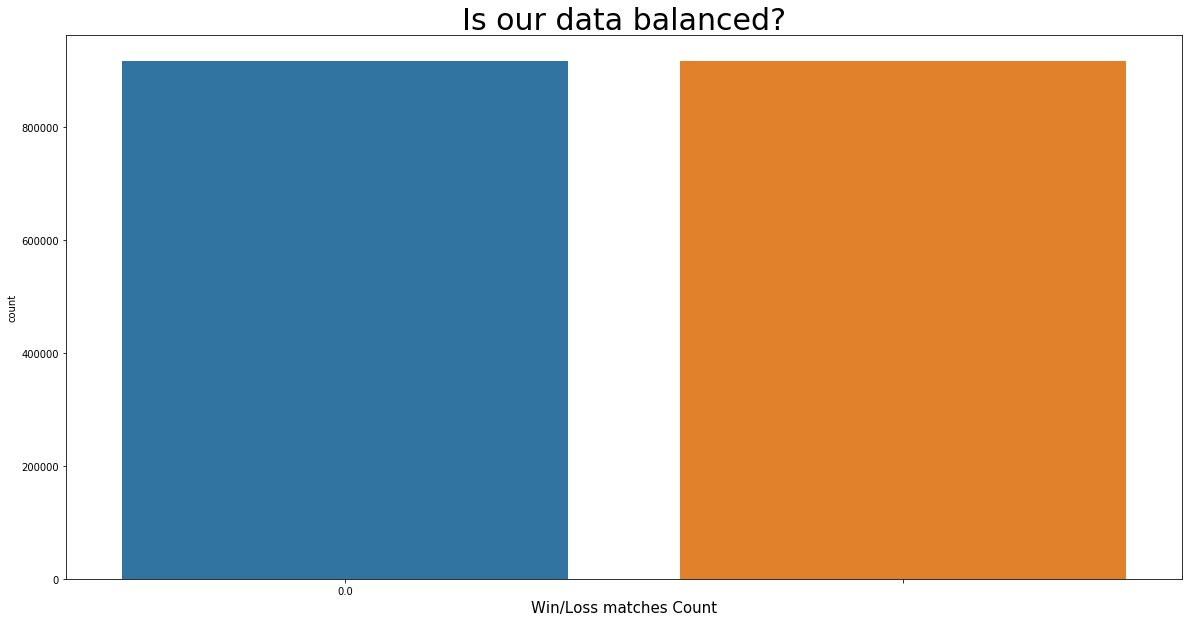

In [0]:
plt.figure(figsize=(20,10))
plot = sns.countplot(players['win'])
for ind, label in enumerate(plot.get_xticklabels()):
    if ind % 25 == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)
plt.title("Is our data balanced?",fontsize=30)
plot.set_xlabel("Win/Loss matches Count",fontsize=15)
plot.tick_params(labelsize=10)
plt.show()

Yep... it is! 
That is a good sign for modelling, because we do not have to do any kind of undersampling
### Individual Player Data

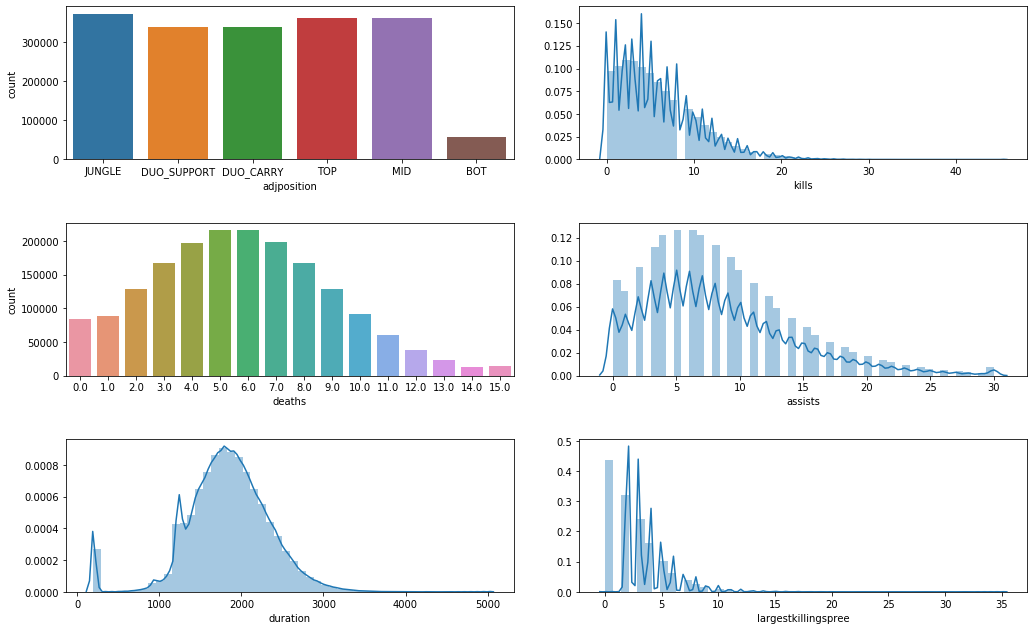

In [0]:
# Let's take a look at the distribution of the most important variables
fig = plt.figure(figsize=(15,60))

cols = ('adjposition',
        'kills',
        'deaths',
        'assists',
        'duration',
        'largestkillingspree')

for i, col in enumerate(cols):
    ax = fig.add_subplot(20, 2, i + 1)

    if len(players[col].unique()) > 20:
        sns.distplot(players[col].dropna())
    else:
        sns.countplot(players[col].dropna())

fig.tight_layout(pad=3)

As we can see we have some outliers here:
   - 0 in duration means that match was cancelled - we have to delete that records
   - we will also trim outliers:
       - largestkillingspree: lower than 15
       - kills: lower than 25
       - duration: lower than 3500 and higher than 0

In [0]:
players = players.query("duration<3500 and duration>0")
players = players.query("largestkillingspree<15")
players = players.query("kills<25")

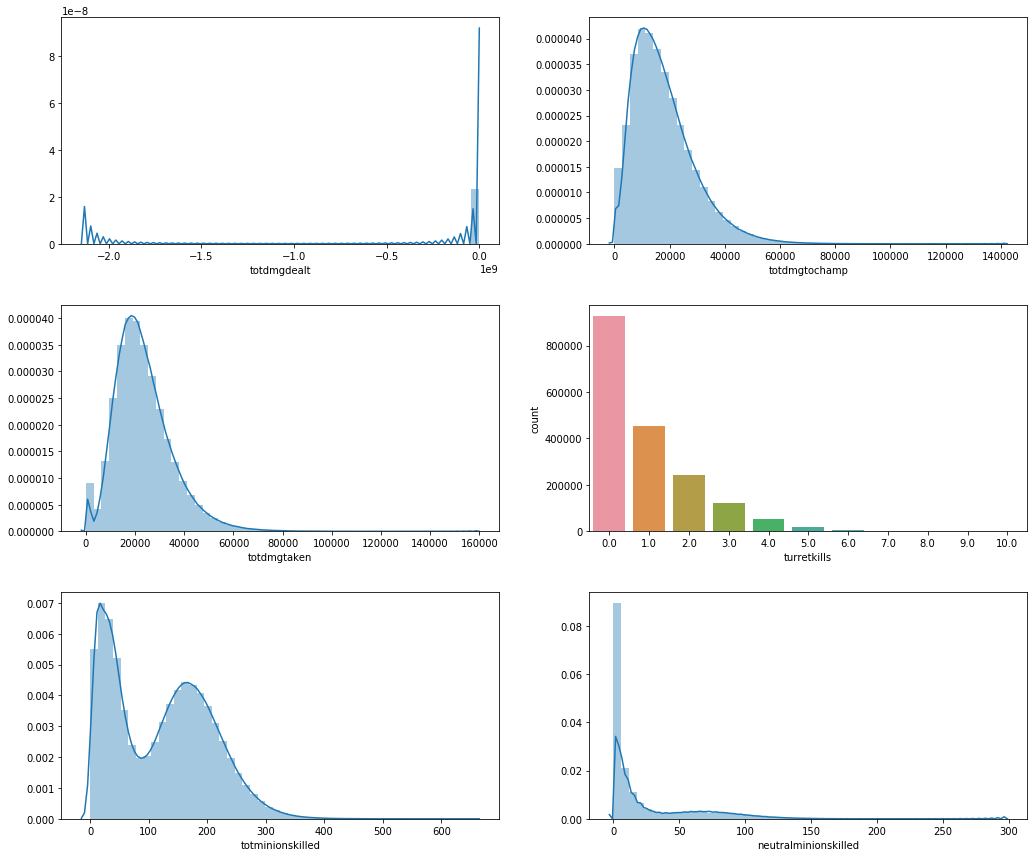

In [0]:
fig = plt.figure(figsize=(15,80))

cols = ('totdmgdealt',
        'totdmgtochamp',
        'totdmgtaken',
        'turretkills',
        'totminionskilled',
        'neutralminionskilled')

for i, col in enumerate(cols):
    ax = fig.add_subplot(20, 2, i + 1)

    if len(players[col].unique()) > 20:
        sns.distplot(players[col].dropna())
    else:
        sns.countplot(players[col].dropna())

fig.tight_layout(pad=3)

As we can see we have again some outliers here:
   - total damage dealt are pretty high numbers, thats why the chart looks like this..
   - we will also trim outliers:
       - totdmgdealt: higher than 0 (we trim afk players) and lower than 400000
       - totdmgtochamp: lower than 60000
       - totdmgtaken: lower than 80000 and higher than 0 (we trim afk players)
       - turretkills: lower than 7
       - totminionskilled: lower than 400
       - neutralminionskilled: lower than 100

In [0]:
players = players.query("totdmgdealt>0 and totdmgdealt<400000")
players = players.query("totdmgtochamp<60000")
players = players.query("totdmgtaken<80000 and totdmgtaken>0")
players = players.query("turretkills<7")
players = players.query("totminionskilled<400")
players = players.query("neutralminionskilled<100")

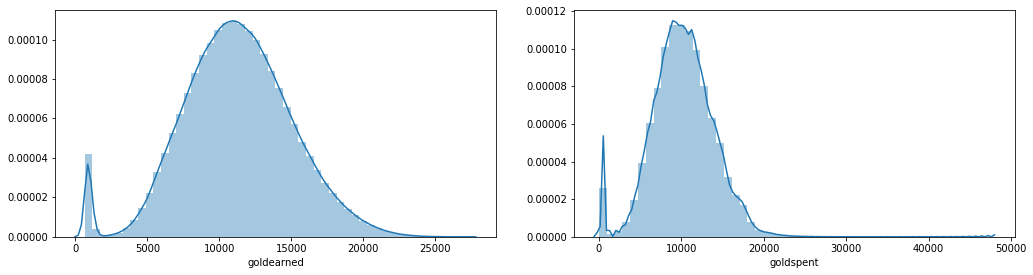

In [0]:
fig = plt.figure(figsize=(15,80))

cols = ('goldearned',
        'goldspent')

for i, col in enumerate(cols):
    ax = fig.add_subplot(20, 2, i + 1)

    if len(players[col].unique()) > 20:
        sns.distplot(players[col].dropna())
    else:
        sns.countplot(players[col].dropna())

fig.tight_layout(pad=3)

Again we have to drop afk players!

In [0]:
players = players.query("goldearned>0 and goldearned<25000")
players = players.query("goldspent>0 and goldspent<25000")

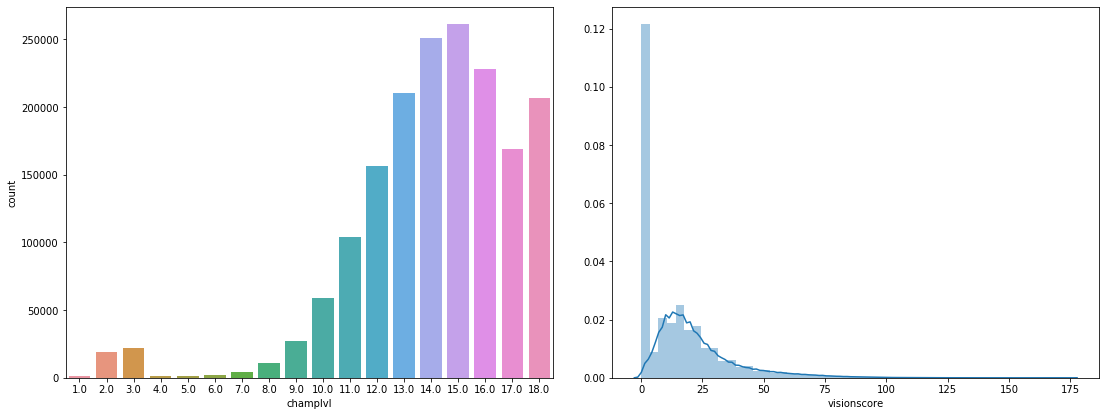

In [0]:
fig = plt.figure(figsize=(16,120))

cols = ('champlvl',
       'visionscore')

for i, col in enumerate(cols):
    ax = fig.add_subplot(20, 2, i + 1)

    if len(players[col].unique()) > 20:
        sns.distplot(players[col].dropna())
    else:
        sns.countplot(players[col].dropna())

fig.tight_layout(pad=3)

### Team Data

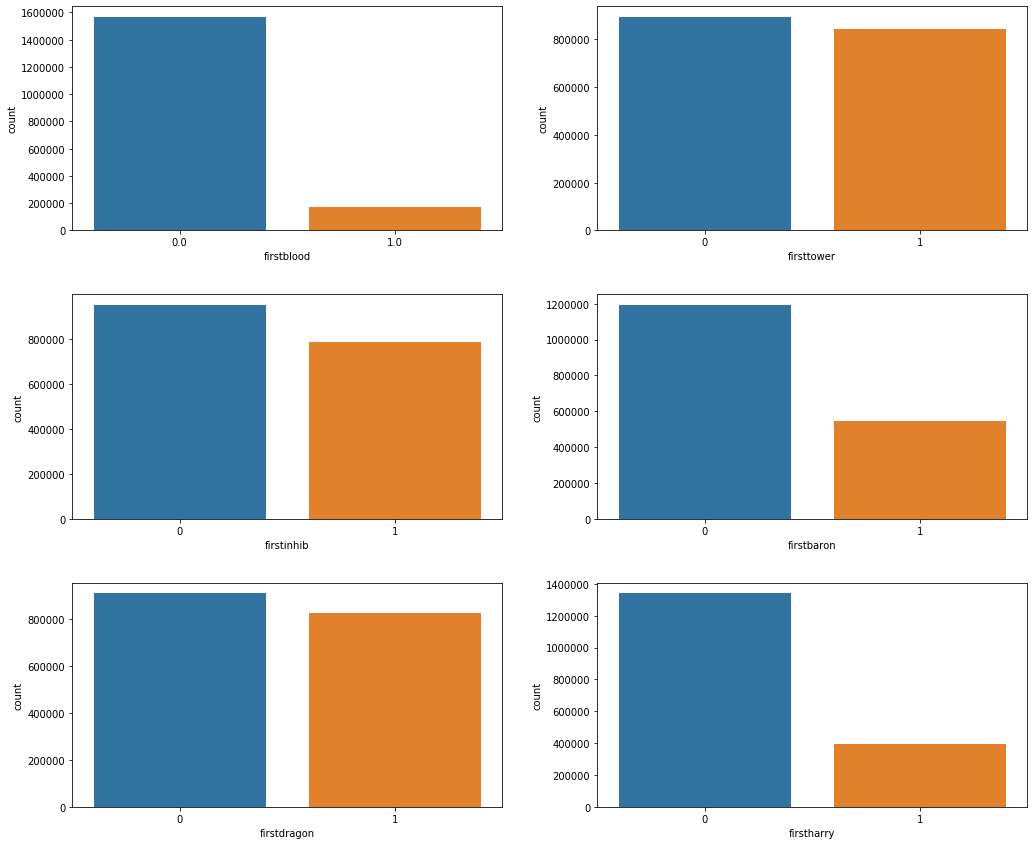

In [0]:
fig = plt.figure(figsize=(15,80))

cols = ('firstblood',
        'firsttower',
        'firstinhib',
        'firstbaron',
        'firstdragon',
        'firstharry')

for i, col in enumerate(cols):
    ax = fig.add_subplot(20, 2, i + 1)

    if len(players[col].unique()) > 20:
        sns.distplot(players[col].dropna())
    else:
        sns.countplot(players[col].dropna())

fig.tight_layout(pad=3)

- Our data here in terms of firstblood and firsttower should be balanced, because in-game there is always a team which does this first - It would be a great problem if our aim was to predict outcome of the match per team
- However, as our analysis is per player, we dont mind and we can leave it as it is

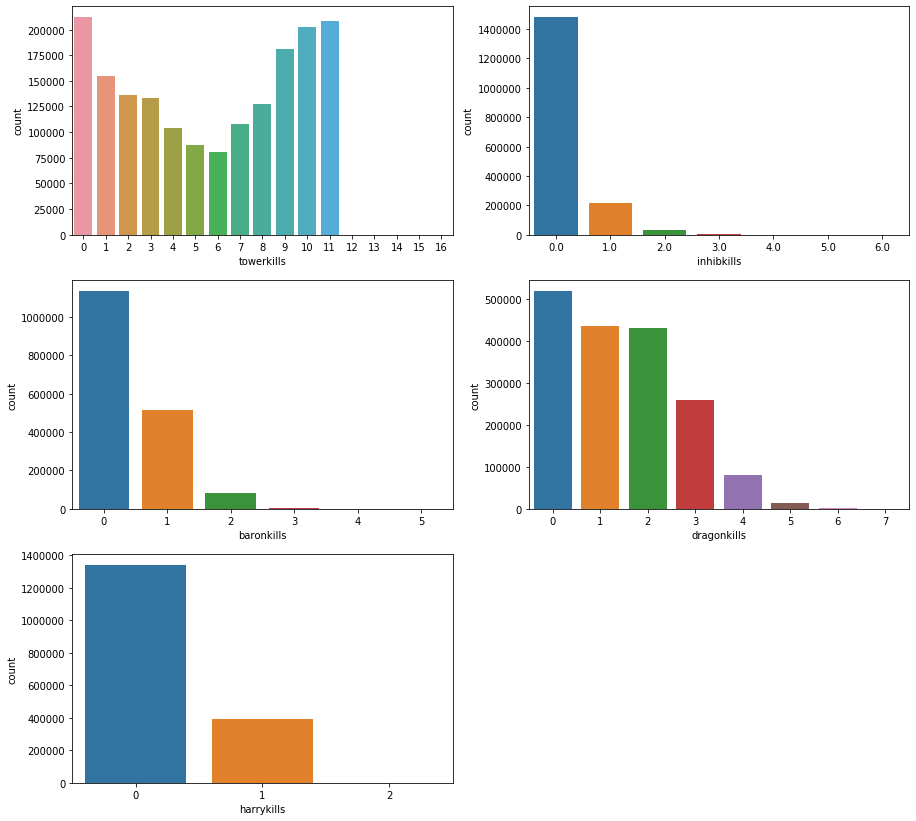

In [0]:
fig = plt.figure(figsize=(15,100))

cols = ('towerkills',
        'inhibkills',
        'baronkills',
        'dragonkills',
        'harrykills')

for i, col in enumerate(cols):
    ax = fig.add_subplot(20, 2, i + 1)

    if len(players[col].unique()) > 20:
        sns.distplot(players[col].dropna())
    else:
        sns.countplot(players[col].dropna())

And our final outliers to clear:
   - harrykills: less than 2
   - dragonkills: less than 6
   - baronkills: less than 3
   - inhibkills: less than 4
   - towerkills: less than 12

In [0]:
players = players.query("harrykills<2")
players = players.query("dragonkills<6")
players = players.query("baronkills<3")
players = players.query("inhibkills<4")
players = players.query("towerkills<12")

## Investigating Correlations among variables
Here we will investigate correlation among our variables

In [0]:
correlationValues = players.corr()

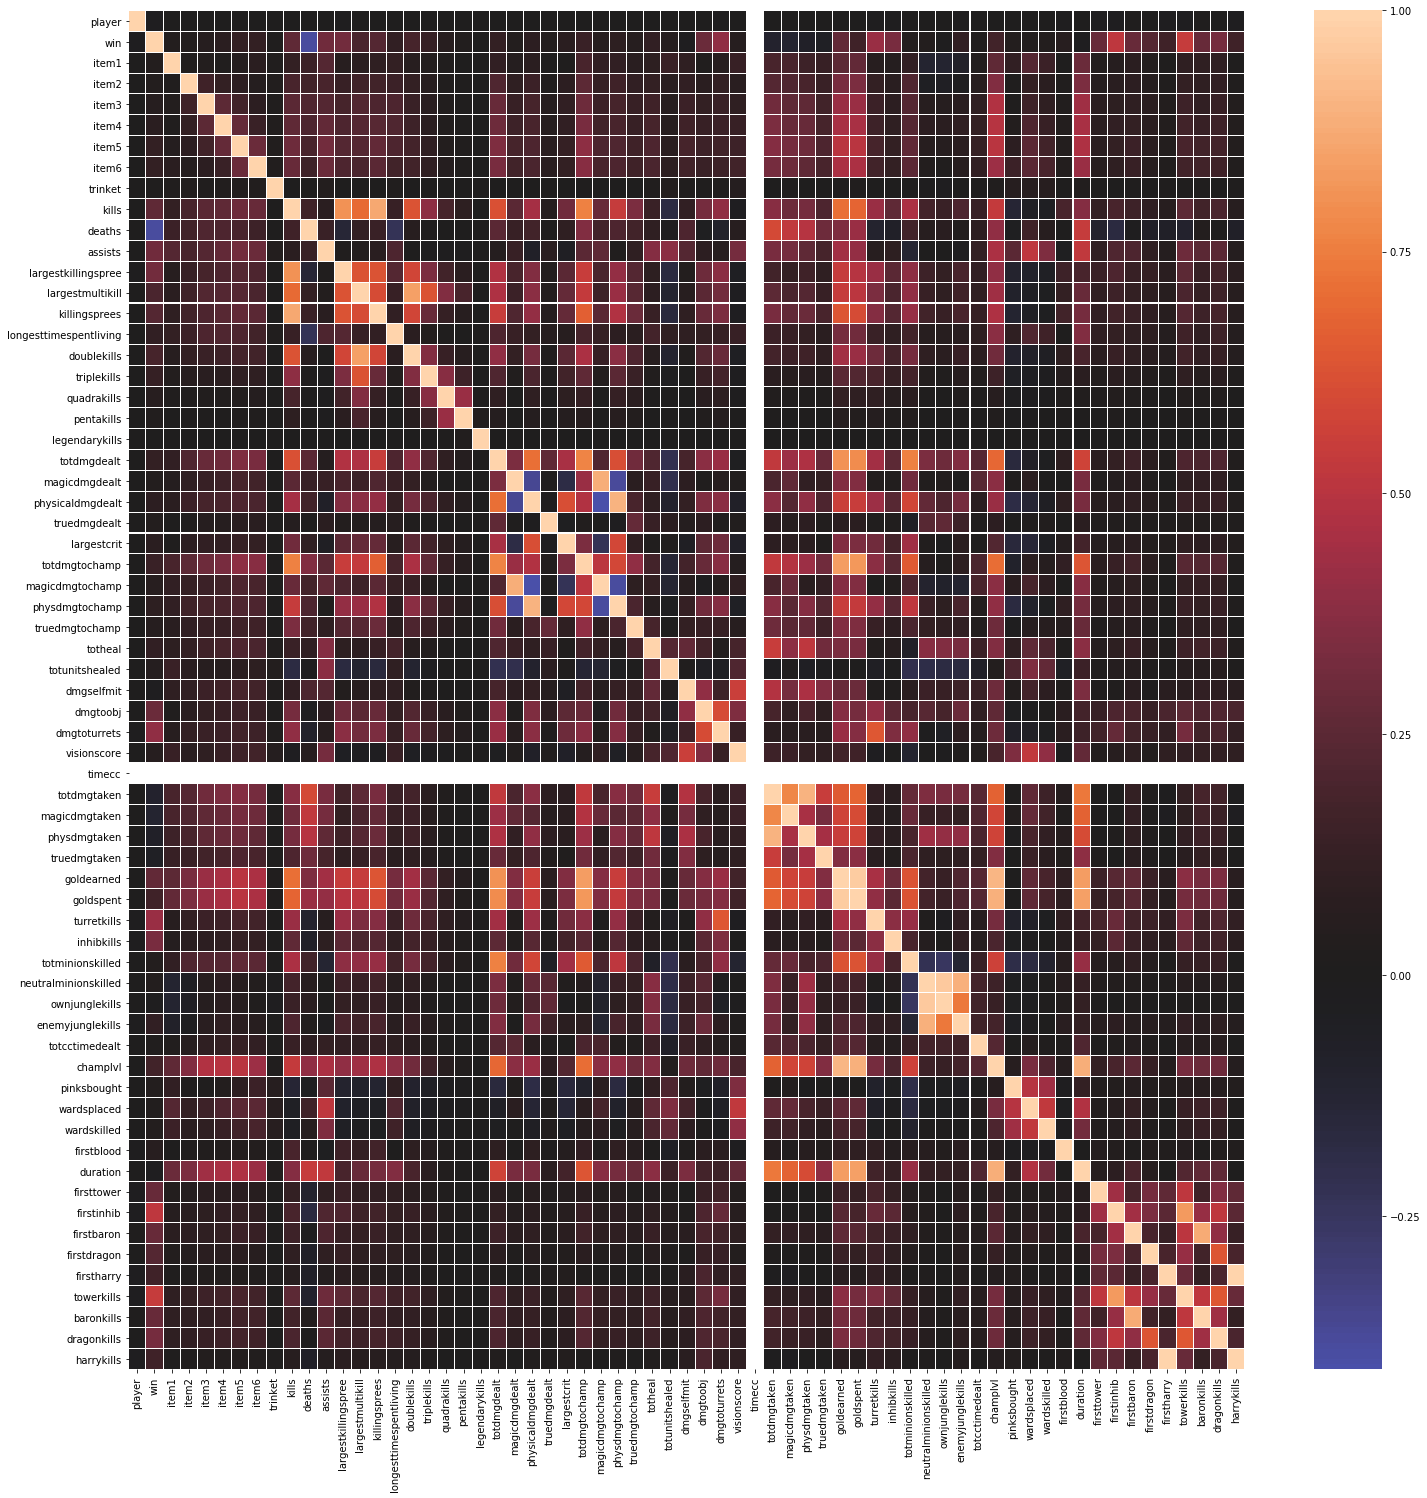

In [0]:
f,ax = plt.subplots(figsize=(25, 25))
sns.heatmap(pd.DataFrame(correlationValues),
            linewidths = 0.05,
            fmt= '.1f',
            ax = ax,
           center = 0)
plt.show()

## Model Estimation

![](https://cdn.lynda.com/course/645050/645050-636700308369503992-16x9.jpg)
Let's look at the data again

In [0]:
players.head(10)

,player,adjposition,champ_chosen,win,item1,item2,item3,item4,item5,item6,trinket,kills,deaths,assists,largestkillingspree,largestmultikill,killingsprees,longesttimespentliving,doublekills,triplekills,quadrakills,pentakills,legendarykills,totdmgdealt,magicdmgdealt,physicaldmgdealt,truedmgdealt,largestcrit,totdmgtochamp,magicdmgtochamp,physdmgtochamp,truedmgtochamp,totheal,totunitshealed,dmgselfmit,dmgtoobj,dmgtoturrets,visionscore,timecc,totdmgtaken,magicdmgtaken,physdmgtaken,truedmgtaken,goldearned,goldspent,turretkills,inhibkills,totminionskilled,neutralminionskilled,ownjunglekills,enemyjunglekills,totcctimedealt,champlvl,pinksbought,wardsplaced,wardskilled,firstblood,duration,firsttower,firstinhib,firstbaron,firstdragon,firstharry,towerkills,baronkills,dragonkills,harrykills
0,1.00,JUNGLE,Warwick,0.00,3748.00,2003.00,3111.00,3053.00,1419.00,1042.00,3340.00,6.00,10.00,1.00,2.00,2.00,2.00,643.00,1.00,0.00,0.00,0.00,0.00,96980.00,25154.00,65433.00,6392.00,0.00,9101.00,3975.00,4237.00,888.00,15160.00,1.00,23998.00,1826.00,1170.00,14.00,0.00,41446.00,13270.00,24957.00,3218.00,10497.00,10275.00,0.00,0.00,42.00,69.00,42.00,27.00,610.00,13.00,0.00,10.00,0.00,0.00,1909.00,1,0,0,0,0,5,0,0,0
1,2.00,DUO_SUPPORT,Nami,0.00,2301.00,3111.00,3190.00,3107.00,0.00,0.00,3364.00,0.00,2.00,12.00,0.00,0.00,0.00,1116.00,0.00,0.00,0.00,0.00,0.00,25995.00,17633.00,6295.00,2066.00,0.00,8478.00,6684.00,977.00,816.00,11707.00,5.00,9402.00,1943.00,1852.00,30.00,0.00,17769.00,7945.00,7688.00,2136.00,9496.00,7975.00,1.00,0.00,17.00,1.00,1.00,0.00,211.00,14.00,1.00,17.00,3.00,0.00,1909.00,1,0,0,0,0,5,0,0,0
2,3.00,DUO_CARRY,Draven,0.00,1055.00,3072.00,3006.00,3031.00,3046.00,1036.00,3340.00,7.00,8.00,5.00,5.00,2.00,1.00,584.00,1.00,0.00,0.00,0.00,0.00,171568.00,1725.00,169576.00,266.00,1042.00,14425.00,331.00,14070.00,24.00,2283.00,2.00,16612.00,5094.00,2128.00,26.00,0.00,25627.00,12538.00,11094.00,1993.00,13136.00,11775.00,0.00,0.00,205.00,3.00,1.00,2.00,182.00,14.00,1.00,13.00,5.00,0.00,1909.00,1,0,0,0,0,5,0,0,0
3,4.00,TOP,Fiora,0.00,1029.00,3078.00,3156.00,1001.00,3053.00,0.00,3340.00,5.00,11.00,2.00,2.00,1.00,1.00,300.00,0.00,0.00,0.00,0.00,0.00,113721.00,989.00,109563.00,3168.00,455.00,15267.00,296.00,11802.00,3168.00,4252.00,1.00,27174.00,8263.00,8263.00,5.00,0.00,31705.00,10280.00,19506.00,1918.00,11006.00,10683.00,3.00,0.00,164.00,6.00,6.00,0.00,106.00,15.00,0.00,3.00,0.00,0.00,1909.00,1,0,0,0,0,5,0,0,0
4,5.00,MID,Viktor,0.00,3020.00,1058.00,3198.00,3102.00,1052.00,1026.00,3340.00,2.00,8.00,2.00,0.00,1.00,0.00,504.00,0.00,0.00,0.00,0.00,0.00,185302.00,166671.00,16867.00,1763.00,0.00,18229.00,17925.00,28.00,275.00,1525.00,1.00,14616.00,3801.00,1724.00,15.00,0.00,20585.00,6850.00,11119.00,2615.00,11439.00,10485.00,1.00,0.00,235.00,4.00,3.00,1.00,159.00,15.00,0.00,10.00,0.00,0.00,1909.00,1,0,0,0,0,5,0,0,0
6,7.00,TOP,Galio,1.00,3025.00,3193.00,3068.00,3047.00,1028.00,3082.00,3363.00,4.00,5.00,11.00,2.00,1.00,1.00,549.00,0.00,0.00,0.00,0.00,0.00,130692.00,118760.00,11580.00,351.00,0.00,15050.00,13396.00,1653.00,0.00,1401.00,1.00,44919.00,6156.00,3119.00,25.00,0.00,21719.00,2840.00,15798.00,3080.00,12192.00,11575.00,2.00,0.00,187.00,6.00,0.00,6.00,179.00,16.00,1.00,7.00,0.00,0.00,1909.00,0,1,1,1,1,10,1,3,1
7,8.00,MID,Ahri,1.00,3135.00,3165.00,3089.00,3020.00,1058.00,3136.00,3340.00,13.00,4.00,8.00,4.00,2.00,4.00,775.00,1.00,0.00,0.00,0.00,0.00,145731.00,86725.00,22692.00,36313.00,0.00,28090.00,20981.00,1826.00,5282.00,4840.00,1.00,8269.00,19085.00,8160.00,12.00,0.00,19174.00,9771.00,8844.00,557.00,14940.00,13750.00,3.00,0.00,183.00,6.00,3.00,3.00,48.00,17.00,0.00,8.00,0.00,0.00,1909.00,0,1,1,1,1,10,1,3,1
8,9.00,DUO_CARRY,Jinx,1.00,3046.00,3031.00,3006.00,3085.00,3072.00,1029.00,3340.00,15.00,3.00,9.00,12.00,1.00,2.00,290.00,0.00,0.00,0.00,0.00,0.00,182680.00,1735.00,173731.00,7213.00,843.00,30749.00,295.00,29703.00,750.00,2802.00,4.00,9815.00,20784.00,9993.00,12.00,0.00,17655.00,6801.00,10225.00,628.00,15970.00,14375.00,2.00,2.00,191.00,7.00,2.00,5.00,440.

We can create a list to hold our results

In [0]:
results = []

Let's split the data into x and y

In [0]:
x =  players.drop('win', axis = 1)
y = players['win']

Next, we can create dummy variables from the position column, and preprocess the data by scaling it to 0 mean and unit variance

In [0]:
# For now drop champion chosen, beacuse it would create too much dummies
x = x.drop('champ_chosen', axis = 1)

# Convert categorical to dummies
x = pd.get_dummies(x)

#Preprocessess data
scaler = StandardScaler()
x = scaler.fit_transform(x)

Split the data into training (70%) and testing (30%) sets. 

In [0]:
#Test-train split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .3)

# Random forest

We use 200 estimators and limit the depth of the tree to avoid overfitting. The number of jobs is equal to maximum and the optimization criterion is entropy (maximize information gain)

In [0]:
if False:
    rf = RandomForestClassifier(n_estimators = 200,
                            n_jobs = -1,
                            max_depth = 7,
                            criterion = "entropy",
                            random_state = 1,
                            verbose = True,
                            )
    rf.fit(x_train, y_train)
    pickle.dump(rf, open('/LOL-Model/My Drive/LOL-Model//models/rf.sav', 'wb'))

We can load the trainde model from a file

In [0]:
rf = pickle.load(open('/LOL-Model/My Drive/LOL-Model//models/rf.sav', 'rb'))

Make a prediction on the test set

In [0]:
preds = rf.predict_proba(x_test)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    1.4s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    6.3s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    6.5s finished


In [0]:
preds = [a[1] for a in preds[1]]
preds = np.asarray(preds)
preds2 = [1 if a > 0.5 else 0 for a in preds]

Then, we can see the relative importance of certain features

In [0]:
x2 = players.drop('win', axis = 1)
x2 = x2.drop('champ_chosen', axis = 1)
x2 = pd.get_dummies(x2)

important_features = pd.DataFrame( list( zip(x2.columns, rf.feature_importances_) ) )
important_features.sort_values(by = 1, axis = 0, ascending = False, inplace = True)
important_features.reset_index(inplace=True)
important_features.drop('index', 1, inplace = True)
important_features.columns = ['Feature', 'Relative importance']
important_features.head(10)

,Feature,Relative importance
0,towerkills,0.19
1,firstinhib,0.13
2,deaths,0.12
3,turretkills,0.08
4,dmgtoturrets,0.07
5,inhibkills,0.06
6,assists,0.05
7,dmgtoobj,0.03
8,goldearned,0.03
9,baronkills,0.02


And the ROC curve. 

AUC=0.948


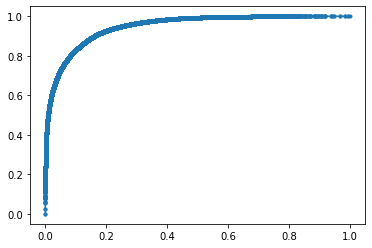

In [0]:
# calculate scores
auc = metrics.roc_auc_score(y_test, preds)
# summarize scores
print('AUC=%.3f' % (auc))
# calculate roc curves
fpr, tpr, _ = metrics.roc_curve(y_test, preds)
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.show()

In [0]:
round(sk.metrics.accuracy_score(y_test.values, preds2), 3)

0.869

In the end, add the results to the list

In [0]:
accu = round(sk.metrics.accuracy_score(y_test.values, preds2), 3)
rmse = np.sqrt(mean_squared_error(y_test, preds))
auc = metrics.roc_auc_score(y_test, preds)
results.append(['Random forest', accu, rmse, auc])

## XGBoost

Let's run the XGBoost algorithm, using mainly the default parameters

In [0]:
if False: 
  xg_reg = xgb.XGBRegressor(objective ='binary:logistic',  
                          n_estimators = 10)
  xg_reg.fit(x_train,
            y_train,
            verbose=True)
  pickle.dump(xg_reg, open('/LOL-Model/My Drive/LOL-Model//models/xg_reg.sav', 'wb'))

In [0]:
xg_reg = pickle.load(open('/LOL-Model/My Drive/LOL-Model//models/xg_reg.sav', 'rb'))

Then, we calculate the predictions

In [0]:
preds = xg_reg.predict(x_test)

As we can see, they have a typical spread - most on 0 and 1, and some scattered in between

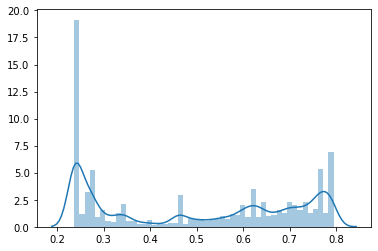

In [0]:
ax = sns.distplot(preds)

For the XGBoost the ROC curve is much more interesting 

AUC=0.925


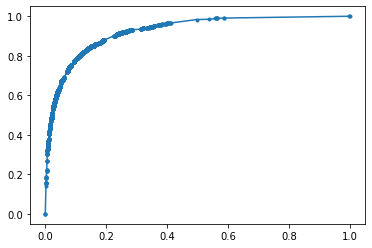

In [0]:
# calculate scores
auc = metrics.roc_auc_score(y_test, preds)
# summarize scores
print('AUC=%.3f' % (auc))
# calculate roc curves
fpr, tpr, _ = metrics.roc_curve(y_test, preds)
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.show()

We make a simple cut at 0.5

In [0]:
preds2 = [1 if a > 0.5 else 0 for a in preds]

The results are quite balanced

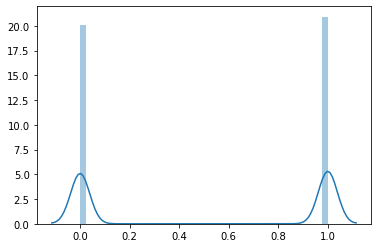

In [0]:
ax = sns.distplot(preds2)

The accuracy is also good, but it's lower than the Random Forest. Probably due to the lack of hyperparameter tuning

In [0]:
round(sk.metrics.accuracy_score(y_test.values, preds2), 3)

0.845

In [0]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 0.369198


The errors in the confusion matrix is quite balanced

In [0]:
pd.crosstab(y_test.values, np.asarray(preds2))

col_0,0,1
row_0,,
0.00,218004,44278
1.00,35878,220172


Finally, lets add to the results

In [0]:
accu = round(sk.metrics.accuracy_score(y_test.values, preds2), 3)
rmse = np.sqrt(mean_squared_error(y_test, preds))
auc = metrics.roc_auc_score(y_test, preds)
results.append(['XGBoost', accu, rmse, auc])

## Cross validation of the XGBoost


In [0]:
# We have to take a sample, otherwise it takes forever 
y_temp = y_train.reset_index(drop = True)
idx = np.random.choice(np.arange(len(x_train)), 10000, replace=False)
x_sample = x_train[idx]
y_sample = y_temp[idx] 

In [0]:
if False:
  xgb_cv = xgb.XGBClassifier(objective = 'binary:logistic')
  # Sample parameters from www:
  param_dist = {'n_estimators': stats.randint(150, 500),
                'learning_rate': stats.uniform(0.01, 0.07),
                'subsample': stats.uniform(0.3, 0.7),
                'max_depth': [3, 4, 5, 6, 7, 8, 9],
                'colsample_bytree': stats.uniform(0.5, 0.45),
                'min_child_weight': [1, 2, 3]
              }
              
  clf = RandomizedSearchCV(xgb_cv, # The model
                          param_distributions = param_dist, # Parameter space
                          n_iter = 35, # How many samples to take
                          scoring = 'accuracy', # We use accuaracy everywhere
                          error_score = 0, # Default for wrong model estiamations
                          verbose = 10, 
                          n_jobs = -1, # Use all cores
                          return_train_score = True # Return scores with results, slightly slower
                           )
  clf.fit(x_sample, y_sample)
  pickle.dump(clf, open('/LOL-Model/My Drive/LOL-Model//models/xg_cv.sav', 'wb'))

In [0]:
clf = pickle.load(open('/LOL-Model/My Drive/LOL-Model//models/xg_cv.sav', 'rb'))

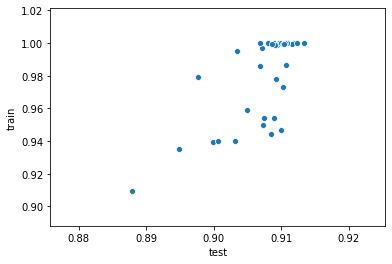

In [0]:
cv_results = pd.DataFrame(clf.cv_results_)
scores = pd.DataFrame({"test" : cv_results.mean_test_score, "train" : cv_results.mean_train_score})
ax = sns.scatterplot(x="test", y="train", data = scores)

Some models seem to be overfitting on the train set, but all results are better than the non-optimized XGBoost. 

In [0]:
xg_best = clf.best_estimator_

The best model takes a 88% sample of the columns, has a learning rate of 0.07, max depth of 8  and the number of estimators is 440. The increase in accuracy in comprarison to the previous model is most probably due to the number of estimators (440 vs just 10).

In [0]:
preds = xg_best.predict_proba(x_test)

In [0]:
preds = [a[1] for a in preds]
preds = np.asarray(preds)
preds2 = [1 if a > 0.5 else 0 for a in preds]

AUC=0.976


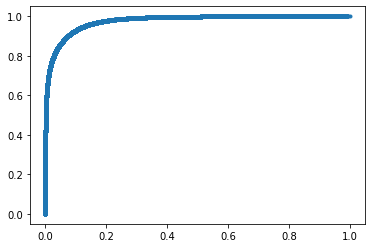

In [0]:
# calculate scores
auc = metrics.roc_auc_score(y_test, preds)
# summarize scores
print('AUC=%.3f' % (auc))
# calculate roc curves
fpr, tpr, _ = metrics.roc_curve(y_test, preds)
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.show()

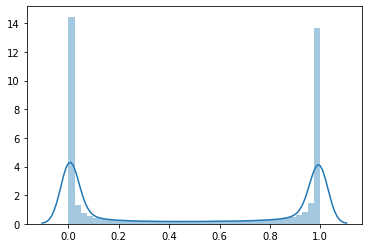

In [0]:
ax = sns.distplot(preds)

In [0]:
round(sk.metrics.accuracy_score(y_test.values, preds2), 3)

0.914

In [0]:
accu = round(sk.metrics.accuracy_score(y_test.values, preds2), 3)
rmse = np.sqrt(mean_squared_error(y_test, preds))
auc = metrics.roc_auc_score(y_test, preds)
results.append(['XGBoost Optimized', accu, rmse, auc])

# Neural network


Now let us finish with a neural network. It consists of 4 dense layers of 100 neurons each, with relu activation functions. In the end there are 2 output nodes with softmax activations (since we want results from 0 to 1). The model will use 10% of data as an internal test set 

In [0]:
if False:
  #Build Neural Network 
  n_cols = x_train.shape[1]
  y_train2 = tf.keras.utils.to_categorical(y_train, num_classes=2)
  hist = History()

  model = Sequential()

  model.add(Dense(100, activation='relu', input_dim = n_cols))
  model.add(Dense(100, activation='relu'))
  model.add(Dense(100, activation='relu'))
  model.add(Dense(100, activation='relu'))


  model.add(Dense(2, activation='softmax'))

  model.compile(optimizer='adam', 
                loss='binary_crossentropy', 
                metrics=['accuracy'])

  model.fit(x_train, y_train2, epochs = 20, validation_split = .1, callbacks = [hist])
  
  # Save the model
  model.save('/LOL-Model/My Drive/LOL-Model//models/nn.h5')

  with open('/LOL-Model/My Drive/LOL-Model//models/nn_history', 'wb') as file_pi:
      pickle.dump(hist.history, file_pi)

Lets load the trained model and the history

In [0]:
model = tf.keras.models.load_model('/LOL-Model/My Drive/LOL-Model//models/nn.h5')

hist = pickle.load(open('/LOL-Model/My Drive/LOL-Model/models/nn_history', "rb"))

Lets examin accuracy first. As we can see, the train set improves with each epoch, but for the test set the results level off. This indicates that the model is ovefitting after about 3-4 epochs. 

In [0]:
y_pred = model.predict(x_test)
y_pred = y_pred[:,1]

The ROC curve is almost unreal, including the AUC score

AUC=0.988


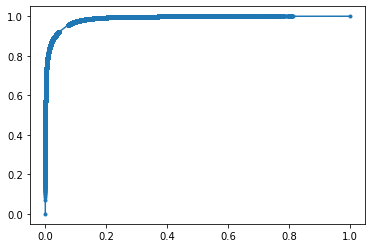

In [0]:
# calculate scores
auc = metrics.roc_auc_score(y_test, y_pred)
# summarize scores
print('AUC=%.3f' % (auc))
# calculate roc curves
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.show()

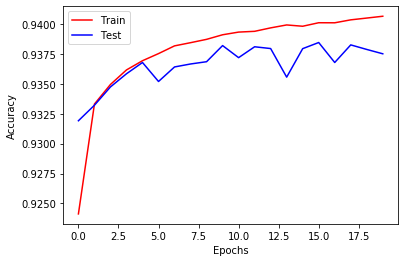

In [0]:
plt.plot(hist['acc'], color = 'red')
plt.plot(hist['val_acc'], color = 'blue')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

This is confirmed when we examin the loss values. Test set falls up to 4 epoch, and then is quite constant.

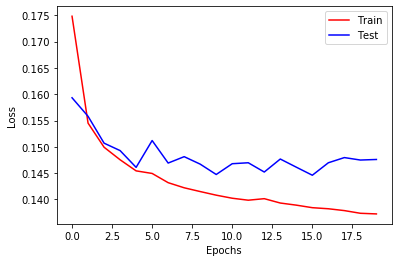

In [0]:
plt.plot(hist['loss'], color = 'red')
plt.plot(hist['val_loss'], color = 'blue')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

Let us add the results. We can use the overfitted ones because in reality the difference is very small (about 0.01)

In [0]:
auc = metrics.roc_auc_score(y_test, y_pred)
y_pred = np.round(y_pred)
accu = round(sk.metrics.accuracy_score(y_test.values, y_pred), 3)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
results.append(['Neural network', accu, rmse, auc])

# Bonus: testing with some suspicious variables removed

In [0]:
x =  players.drop(['win',
                   'towerkills',
                   'firstinhib',
                   'turretkills',
                   'dmgtoturrets',
                   'inhibkills',
                   'champ_chosen'], axis = 1)
y = players['win']

# Convert categorical to dummies
x = pd.get_dummies(x)

#Preprocessess data
scaler = StandardScaler()
x = scaler.fit_transform(x)
#Test-train split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .3)

In [0]:
if False:
  xg_reg = xgb.XGBRegressor(objective ='binary:logistic',  
                            n_estimators = 20)

  xg_reg.fit(x_train,
            y_train,
            verbose=True)
  pickle.dump(xg_reg, open('/LOL-Model/My Drive/LOL-Model//models/xg_reg_removed.sav', 'wb'))

In [0]:
xg_reg = pickle.load(open('/LOL-Model/My Drive/LOL-Model//models/xg_reg_removed.sav', 'rb'))

AUC=0.910


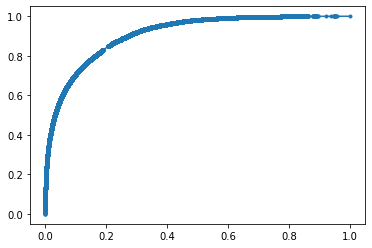

In [0]:
preds = xg_reg.predict(x_test)
# calculate scores
auc = metrics.roc_auc_score(y_test, preds)
# summarize scores
print('AUC=%.3f' % (auc))
# calculate roc curves
fpr, tpr, _ = metrics.roc_curve(y_test, preds)
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.show()

In [0]:
preds2 = [1 if a > 0.5 else 0 for a in preds]

In [0]:
accu = round(sk.metrics.accuracy_score(y_test.values, preds2), 3)
rmse = np.sqrt(mean_squared_error(y_test, preds))
auc = metrics.roc_auc_score(y_test, preds)
results.append(['XGBoost removed suspicious', accu, rmse, auc])

## Bonus: don't drop heroes

In [0]:
x =  players.drop('win', axis = 1)
y = players['win']

# Convert categorical to dummies
x = pd.get_dummies(x)

#Preprocessess data
scaler = StandardScaler()
x = scaler.fit_transform(x)
#Test-train split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .3)

In [0]:
n_cols = x_train.shape[1]
y_train2 = tf.keras.utils.to_categorical(y_train, num_classes=2)

hist = History()

model = Sequential()

model.add(Dense(100, activation='relu', input_dim = n_cols))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(100, activation='relu'))

model.add(Dense(2, activation='softmax'))

model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

model.fit(x_train, y_train2, epochs = 20, validation_split = .1, callbacks = [hist])
model.save('/LOL-Model/My Drive/LOL-Model//models/nn3.h5')

with open('/LOL-Model/My Drive/LOL-Model//models/nn3_history', 'wb') as file_pi:
  pickle.dump(hist.history, file_pi)

Train on 1088495 samples, validate on 120944 samples
Epoch 1/20
1088495/1088495 [==============================] - 133s 122us/sample - loss: 0.1869 - accuracy: 0.9187 - val_loss: 0.1622 - val_accuracy: 0.9302
Epoch 2/20
1088495/1088495 [==============================] - 132s 122us/sample - loss: 0.1557 - accuracy: 0.9325 - val_loss: 0.1532 - val_accuracy: 0.9334
Epoch 3/20
1088495/1088495 [==============================] - 132s 121us/sample - loss: 0.1494 - accuracy: 0.9353 - val_loss: 0.1477 - val_accuracy: 0.9360
Epoch 4/20
1088495/1088495 [==============================] - 131s 121us/sample - loss: 0.1456 - accuracy: 0.9369 - val_loss: 0.1507 - val_accuracy: 0.9339
Epoch 5/20
1088495/1088495 [==============================] - 132s 122us/sample - loss: 0.1427 - accuracy: 0.9381 - val_loss: 0.1454 - val_accuracy: 0.9372
Epoch 6/20
1088495/1088495 [==============================] - 132s 121us/sample - loss: 0.1407 - accuracy: 0.9390 - val_loss: 0.1443 - val_accuracy: 0.9376
Epoch 7/20


In [0]:
model = tf.keras.models.load_model('/LOL-Model/My Drive/LOL-Model//models/nn3.h5')

hist = pickle.load(open('/LOL-Model/My Drive/LOL-Model/models/nn3_history', "rb"))

In [0]:
y_pred = model.predict(x_test)
y_pred = y_pred[:,1]

AUC=0.988


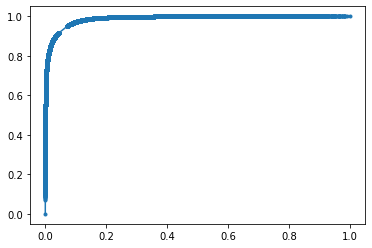

In [0]:
# calculate scores
auc = metrics.roc_auc_score(y_test, y_pred)
# summarize scores
print('AUC=%.3f' % (auc))
# calculate roc curves
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.show()

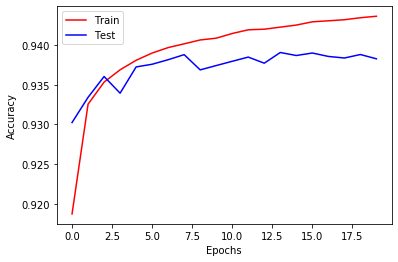

In [0]:
plt.plot(hist['accuracy'], color = 'red')
plt.plot(hist['val_accuracy'], color = 'blue')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

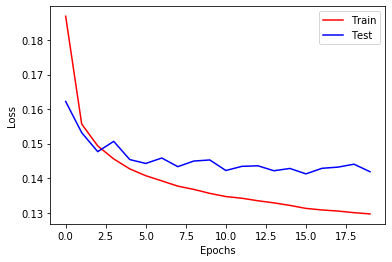

In [0]:
plt.plot(hist['loss'], color = 'red')
plt.plot(hist['val_loss'], color = 'blue')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [0]:
auc = metrics.roc_auc_score(y_test, y_pred)
y_pred = np.round(y_pred)
accu = round(sk.metrics.accuracy_score(y_test.values, y_pred), 3)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
results.append(['Neural network with heroes', accu, rmse, auc])

# Results!

In our testing, the Neural Network achieved the best results in all categories: Accuracy, MSE and the AUC. The Random Forest had better results than the unoptimized XGBoost, but the results improved significantly with optimization.  

In [0]:
results2 = pd.DataFrame(results, copy = True)
results2.columns = ['Method', 'Accuracy', 'Mean squared error', 'Area under curve']
results2.sort_values("Accuracy")

,Method,Accuracy,Mean squared error,Area under curve
4,XGBoost removed suspicious,0.82,0.37,0.91
1,XGBoost,0.84,0.37,0.92
0,Random forest,0.87,0.32,0.95
2,XGBoost Optimized,0.91,0.25,0.98
5,Neural network with heroes,0.94,0.25,0.99
3,Neural network,0.94,0.25,0.99


When we removed some correlated ('suspicious') variables and retested the XGBoost, the results were weaker (82% vs 84%), but the were still quite good. This leads us to belive there is no information leakage in this variables, and they just help the model the same way other variables help it. 

Optimizing the XGBoost with cross validation and hyperparameter tuning (on a 10k sample) increased the results significantly (82% vs 91%). However, we beleive this is mainly due to the significantly higher number of estimators (440 vs 10). We were able to run this models thanks to the sampling - running the whole dataset on the 440 estimators would take probably more than a day. 

We tried to run the neural network with the heroes column converted to binary columns, but the results were the same. However, the model too considerably longer to train.